# Fun with Graphs

Now that you have had an introduction to programming, we are going to start using these tools to explore our dataset!

In [38]:
# This is import code we will use later. Just run the cell.
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
import statsmodels.formula.api as sm
%matplotlib inline 
plt.style.use("fivethirtyeight")

In [5]:
# Here is our dataset for reference.
Table.read_table("./data/ces_data.csv")

Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),ZIP,Nearby City (to help approximate location only),Longitude,Latitude,CES 3.0 Percentile,CES 3.0 Percentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
6.019e+09,94.09,100,95-100% (highest scores),3174,Fresno,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,93706,Fresno,-119.782,36.7097,100,95-100% (highest scores),Yes,0.065,98.18,15.4,97.22,48.524,95.54,681.2,80.92,2.75,47.82,18552,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26,79.4,92.12,9.55,99.7
6.071e+09,90.68,99.99,95-100% (highest scores),6133,San Bernardino,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,91761,Ontario,-117.618,34.0578,99.99,95-100% (highest scores),Yes,0.062,91.1,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.24,89.05,782.26,55.66,66.2,97.68,36,85.57,1.25,88.77,5,55.01,12,92.17,81.19,10,100,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
6.019e+09,85.97,99.97,95-100% (highest scores),3167,Fresno,21.5,72.5,6,63.6,5.3,18.9,0.6,9.8,1.8,93706,Fresno,-119.806,36.7355,99.97,95-100% (highest scores),Yes,0.062,91.1,15.4,97.22,47.445,95.42,681.2,80.92,3.03,48.75,12454.9,95.42,576.52,39,22,85.13,30.25,81.93,0.2,60.5,0,0,2.5,57.18,71.16,8.76,99,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
6.077e+09,82.49,99.96,95-100% (highest scores),6692,San Joaquin,18.7,74.5,6.8,57.4,6,12.5,0.3,20.9,2.8,95203,Stockton,-121.315,37.9405,99.96,95-100% (highest scores),Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.78,69.97,1305.01,78.29,50.1,96.1,132.1,98.41,0.795,84.32,19,98.63,27,99.1,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.7,8.99,97.72
6.019e+09,82.03,99.95,95-100% (highest scores),2206,Fresno,14.8,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,93725,Fresno,-119.718,36.6816,99.95,95-100% (highest scores),Yes,0.065,98.18,15.4,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.7,98.15,435.16,24.3,60,97.15,54.2,92.09,13.1,99.7,0,0,50.8,99.91,80.2,9.88,99.99,90.48,89.54,4.5,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.3,92.76
6.0372e+09,80.73,99.94,95-100% (highest scores),2598,Los Angeles,15.3,74.5,10.2,98.1,1.2,0.1,0.1,0.2,0.3,90023,Los Angeles,-118.197,34.0175,99.94,95-100% (highest scores),Yes,0.046,53.02,12.89,92.89,56.52,96.98,714.48,83.49,0,0,39040.2,99.3,2943.44,97.19,36.7,93.14,25,77.29,4.93,96.31,7,71.61,3.85,65.67,76.73,9.45,99.88,68.74,77.63,7.35,93.21,10.4,77.62,53.1,95.67,23.7,89.15,66.4,90.23,11.6,67.42,22,67.03,82.36,8.54,94.89
6.077e+09,80.18,99.92,95-100% (highest scores),2396,San Joaquin,16.7,69.8,13.5,51.8,16.4,16.4,1.3,9.9,4.1,95203,Stockton,-121.302,37.9524,99.92,95-100% (highest scores),Yes,0.046,53.02,13.44,94,21.76,66.48,278.76,29.11,172.49,79.19,707.536,56.11,885.52,61.94,89.7,98.89,149.05,98.74,0.135,50.68,14,94.41,2.3,52.98,68.27,8.41,98.07,169.56,99.3

## Correlation

Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. The study of how variables are correlated is called correlation analysis.

Some examples of data that have a high correlation:

    Your caloric intake vs. your weight.
    Your eye color vs. your relatives’ eye colors.
    The amount of time your study vs. your GPA.

Some examples of data that have a low correlation (or none at all):

    Your sexual preference vs. the type of cereal you eat.
    A dog’s name vs. the type of dog biscuit they prefer.
    The cost of a car wash vs. how long it takes to buy a soda inside the station.

Correlations are useful because if you can find out what relationship variables have, you can make predictions about future behavior. Knowing what the future holds is very important in the social sciences like government and healthcare.

The **correlation coefficient** ( r ) puts a value to the relationship and shows how strong it is. The value is between -1 and 1 where 0 is no relationship, -1 is a perfect negative relationship, and 1 is a perfect positive relationship. Correlation is also necessary for regression (which we will get to later).

![image](./images/correlation-examples.svg)

If we wanted to look at the relationship between two of the variables in our dataset, we could calculate the correlation. For example, asking how race is related to a particular health factor, such as asthma.

In [26]:
data = Table.read_table("./data/ces_data.csv")
clean_data = Table.read_table("cleaned_data_new.csv")
clean_data

census_tract,hispanic,white,african_american,native_american,asian_american,other,unemployment,poverty,ces_pollution_score,ozone,pesticides,tox_release,asthma,cardiovascular_disease,low_birth_weight
6.019e+09,65.3,4.2,24.6,0.5,3.5,1.8,17.6,76.3,94.09,0.065,2.75,18552,131.64,14.13,7.44
6.071e+09,91.1,5.8,0.7,0.3,1.4,0.7,12.3,72.5,90.68,0.062,1.37,7494.24,60.66,12.94,7.04
6.019e+09,63.6,5.3,18.9,0.6,9.8,1.8,16.1,86.8,85.97,0.062,3.03,12454.9,142.12,14.96,10.16
6.077e+09,57.4,6,12.5,0.3,20.9,2.8,19.6,61.3,82.49,0.046,12.93,2387.78,142.17,14.72,6.23
6.019e+09,71.8,21.4,1.2,0.5,4.5,0.6,18.6,66.4,82.03,0.065,3518.41,21790.7,90.48,12.82,4.5
6.0372e+09,98.1,1.2,0.1,0.1,0.2,0.3,11.6,66.4,80.73,0.046,0,39040.2,68.74,10.4,7.35
6.077e+09,51.8,16.4,16.4,1.3,9.9,4.1,14.4,76.2,80.18,0.046,172.49,707.536,169.56,12.7,8.36
6.019e+09,52.7,2.7,28.7,0.4,14.3,1.2,20,74.5,80.13,0.065,1435.93,6996.96,142.28,14.96,7.83
6.03721e+09,79.3,8.9,4.1,0.1,7.2,0.5,28.5,75.7,79.03,0.046,0,10378.2,58.03,7.24,6.71
6.019e+09,78,9.1,5.8,0.8,5.3,0.9,23.5,83.4,78.53,0.065,114.96,125384,107.8,14.75,4.79


r:  0.5452274394377603


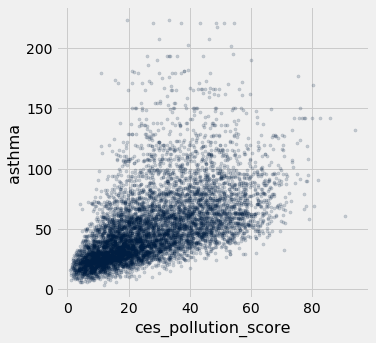

In [27]:
def standard_units(xyz):
    return (xyz - np.mean(xyz))/np.std(xyz) 

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

print('r: ', correlation(clean_data, 'ces_pollution_score', 'asthma'))
clean_data.scatter("ces_pollution_score", "asthma", alpha = .18, s = 10)

#### Based on this scatter plot, what do you think the r-value would be?
**r-value** is how varied the y-values are from each other. (not the slope) 

## Regression

Linear regression is a type of statistical modeling that explores the relationship between variables and determines whether one variable is related on other variables. This relationship can then be illustrated by a trend-line that’s overlaid on your data (also called a best-fit line) as shown below. 

![image](./images/cat-fur.png)

Linear regression consists of finding the best-fitting straight line thorugh points. The best-fitting line is called a regression line with the equation:

y = ax + b  (You've seen this before)

**y** being the result. (Length of Fur)

**x** being the variable. (Time Spent Vacuuming)

**a** being a value that is to be determined. It is referred to as the coefficient, and is sort of like magnitude of change that y goes through when x changes. (Relationship)

**b** being a constant that is to be determined. It is referred to as the intercept because, when x is 0 then y = b
Simple linear regression follows the assumption that with all the data you’ve found so far, you can draw a line [y = ax + b] to identify a trend with these points and then figure out what y is at any value that x is.

Some other examples of statistical relationships might include:

- Height and weight — as height increases, you'd expect weight to increase, but not perfectly.

- Alcohol consumed and blood alcohol content — as alcohol consumption increases, you'd expect one's blood alcohol content to increase, but not perfectly.

- Vital lung capacity and pack-years of smoking — as amount of smoking increases (as quantified by the number of pack-years of smoking), you'd expect lung function (as quantified by vital lung capacity) to decrease, but not perfectly.

- Driving speed and gas mileage — as driving speed increases, you'd expect gas mileage to decrease, but not perfectly.

#### We need the correlation in order to find the regression line.

There is another metric, similar to the correlation coefficient **(r)** called **r-squared** which helps us assess the effectiveness of our predictive model. 

In a **simple linear** regression model (like the example above), the r-squared is simply the square of the correlation coefficient. Hoewever, when dealing with more than one variable in a **multiple regression** model, r-squared is a more useful metric because we cannot calculate a single correlation coefficient (like r).

In [28]:
def standard_units(xyz):
    return (xyz - np.mean(xyz))/np.std(xyz) 

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

# We use these function to calculate these values for us. As you can see, the correlation is used to 
# find the slope of the regression line below.

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y) # correlation function used in slope!
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

## Back to our data set

Given a census table, our goal is to discover something about the data that will enhance our understanding of a population. Correlation allows us to determine a preliminary relationship between two variables (such as **asthma** and **race**) and allows us to continue with regression, which explores the relationship further and gives us a best-fit line. In the next lab, we will be putting these skills to use and calculating the correlation coefficients and regression lines with factors from our dataset. We will do this using functions that calculate it for us! They will look something like this:

In [31]:
# This calculates the slope of our regression line.
slope_of_reg_line = slope(clean_data, "ces_pollution_score", "asthma")
slope_of_reg_line

1.0216919420029222

In [32]:
# This will calculate our intercept.
intercept_of_reg_line = intercept(clean_data, "ces_pollution_score", "asthma")
intercept_of_reg_line

23.65672250495051

Now that you have a slope and intercept, it can go into the equation: **y = mx + b** and create the regression line.
We could plot the regression line on our data set manually, however, as shown below, we can use a scatter plot which creates it for us!

r:  0.5452274394377603


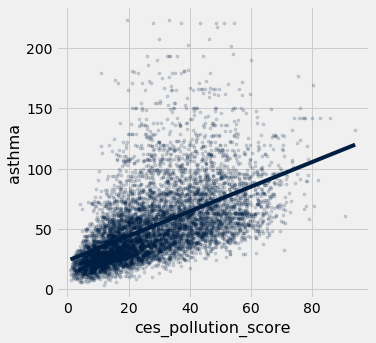

In [36]:
print('r: ', correlation(clean_data, 'ces_pollution_score', 'asthma'))
clean_data.scatter("ces_pollution_score", "asthma", fit_line=True, alpha = .18, s = 10)

We have the r-value above from the correlation function. To find r-squared, run the call below.

`r:  0.5452274394377603`

In [39]:
model = sm.ols(formula='asthma ~ ces_pollution_score', data = clean_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 asthma   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     3196.
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:14:20   Log-Likelihood:                -35167.
No. Observations:                7557   AIC:                         7.034e+04
Df Residuals:                    7555   BIC:                         7.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              23.6567      0.589     40.196      0.000      22.503      24.810
ces_pollution_score     1.0217      0.018     56.533      0.000       0.986       1.057
==============================================================================
Omnibus:                     3021.143   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15029.260
Skew:                           1.888   Prob(JB):                         0.00
Kurtosis:                       8.786   Cond. No.                         65.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`r:  0.5452274394377603`
`r-squared: 0.297`

As you can see, in this case (because it is simple linear regression), the r-squared value is the square of the correlation coefficient ( r ). In the next lab the r-squared will be different once you are working with multiple regression. 

## Your Turn

In previous example, we explored the relationship between an environmental outcome and a health issue. Now let's look at how this health issue compares with a certain demographic.

r:  0.4986847676603604


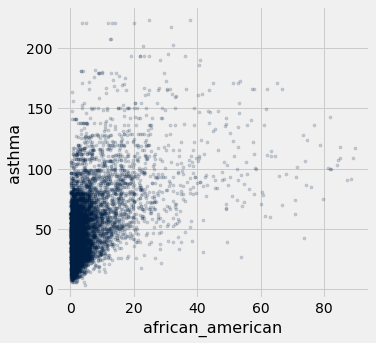

In [56]:
# This will find the correlation coefficient between African Americans and Asthma.
print('r: ', correlation(clean_data, 'african_american', 'asthma'))
clean_data.scatter("african_american", "asthma", alpha = .18, s = 10)

`r:  0.4986847676603604`

In [59]:
# Now fill this in to find the slope of our regression line.
slope_of_reg_line = ...
slope_of_reg_line

Ellipsis

In [60]:
# Now fill this in to find the intercept of our regression line.
intercept_of_reg_line = ...
intercept_of_reg_line

Ellipsis

r:  0.4986847676603604


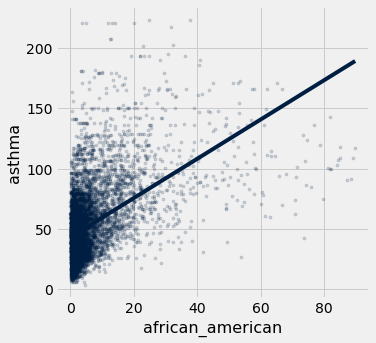

In [61]:
print('r: ', correlation(clean_data, 'african_american', 'asthma'))
clean_data.scatter("african_american", "asthma", fit_line=True, alpha = .18, s = 10)

In [62]:
model = sm.ols(formula='asthma ~ african_american', data = clean_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 asthma   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     2501.
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:36:56   Log-Likelihood:                -35420.
No. Observations:                7557   AIC:                         7.084e+04
Df Residuals:                    7555   BIC:                         7.086e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           43.0323      0.357    120.556      0.000      42.333      43.732
african_american     1.6268      0.033     50.007      0.000       1.563       1.691
==============================================================================
Omnibus:                     1877.813   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6012.645
Skew:                           1.257   Prob(JB):                         0.00
Kurtosis:                       6.574   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`r-squared: 0.249`

Since our r-value is low (far from 1) it shows us that we need to conduct a multiple regression because a single variable is not sufficient to predict asthma. Usually, there are multiple factors that affect an outcome so it makes sense that we need to do more than a simple analysis.

Predictions are a powerful tool that we will explore more in the next lab using these techniques! If you would like to learn more about the theory behind standard units or explore these equations further, statistics classes or data 8 are great places to start!